In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk
File does not exist: /shared/CSHL_data_processed/MD635/MD635_anchor.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_sorted_filenames.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_cropbox.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_cropbox.txt


In [3]:
stack_fixed = 'MD657'
stack_moving = 'atlasV3'

In [4]:
classifier_setting = 30
warp_setting = 1

In [5]:
registration_settings

,upstream_warp_id,transform_type,terminate_thresh,grad_computation_sample_number,grid_search_sample_number,std_tx,std_ty,std_tz,std_theta_xy,surround_weight,regularization_weight
warp_id,,,,,,,,,,,
1,None,affine,0.000010,100000.0,1000.0,100,100,100,30,0,NaN
2,1,rigid,0.000010,100000.0,10000.0,100,100,100,30,0,NaN
4,1,rigid,0.000001,100000.0,10000.0,100,100,100,10,0,0.000001
5,1,rigid,0.000001,100000.0,10000.0,100,100,100,30,inverse,0.000000
6,1,affine,0.000010,100000.0,10000.0,100,100,100,30,-0.5,0.000000
7,None,rigid,0.000001,100000.0,1000.0,50,50,50,10,0,NaN
10,None,rigid,0.000010,100000.0,1000.0,100,100,100,30,0,NaN
11,1,affine,0.000010,100000.0,10000.0,100,100,100,30,-0.1,0.000000


In [6]:
warp_properties = registration_settings.loc[warp_setting]
print warp_properties

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
transform_type = warp_properties['transform_type']
terminate_thresh = warp_properties['terminate_thresh']
grad_computation_sample_number = warp_properties['grad_computation_sample_number']
grid_search_sample_number = warp_properties['grid_search_sample_number']
std_tx = warp_properties['std_tx']
std_ty = warp_properties['std_ty']
std_tz = warp_properties['std_tz']
std_theta_xy = np.deg2rad(warp_properties['std_theta_xy'])

upstream_warp_id                    None
transform_type                    affine
terminate_thresh                   1e-05
grad_computation_sample_number    100000
grid_search_sample_number           1000
std_tx                               100
std_ty                               100
std_tz                               100
std_theta_xy                          30
surround_weight                        0
regularization_weight                NaN
Name: 1, dtype: object


In [7]:
volume_moving, structure_to_label_moving, label_to_structure_moving = \
DataManager.load_original_volume_all_known_structures(stack=stack_moving, sided=True, volume_type='score')

print volume_moving[1].shape

File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_annotationVolume/atlasV3_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_outerContour.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_outerContour.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_outerContour.bp


Child returned 0
Child returned 1
0.66 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_outerContour.bp
Score volume for outerContour does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_sp5.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_sp5.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_sp5.bp
(373, 430, 369)


Child returned 1
0.66 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_sp5.bp
Score volume for sp5 does not exist.
Volume shape: (373, 430, 369)


In [8]:
volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
DataManager.load_original_volume_all_known_structures(stack=stack_fixed, classifier_setting=classifier_setting, 
                                                   sided=False, volume_type='score')

print volume_fixed[1].shape

File does not exist: /shared/CSHL_volumes/MD657/MD657_down32_annotationVolume/MD657_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_outerContour.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_outerContour.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_outerContour.bp


Child returned 1
1.15 seconds.
File does not exist: /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_outerContour.bp
Score volume for outerContour does not exist.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_sp5.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_sp5.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_sp5.bp
(530, 862, 367)


Child returned 1
1.17 seconds.
File does not exist: /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volumes/MD657_down32_scoreVolume_clf_30_sp5.bp
Score volume for sp5 does not exist.
Volume shape: (530, 862, 367)


In [9]:
label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                     for label_m, name_m in label_to_structure_moving.iteritems()
                     if name_m in ['7N_L', '7N_R', '12N', '5N_L', 'Pn_R', 'SNR_L', 
                                   'VLL_R', '7n_L', 'Tz_R', 'VCA_L', 'VCP_R']}

# label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
#                      for label_m, name_m in label_to_structure_moving.iteritems()}

In [58]:
# volume_moving_structure_sizes = {l: np.count_nonzero(vol > 0) for l, vol in volume_moving.iteritems()}

In [59]:
# structures_sorted_by_size = [x[1] for x in sorted((s, label_to_structure_moving[l]) for l, s in volume_moving_structure_sizes.iteritems())]
# print structures_sorted_by_size

In [10]:
label_weights_m = {}
for label_m, name_m in label_to_structure_moving.iteritems():
    if 'surround' in name_m:
        label_weights_m[label_m] = 0
    else:
        label_weights_m[label_m] = 1
#         label_weights_m[label_m] = np.minimum(1e5 / volume_moving_structure_sizes[label_m], 1.)

# Compute Registration

In [11]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [12]:
# aligner.set_centroid(centroid_m='origin', centroid_f='origin')
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='centroid_m')
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[structure_to_label_moving['7N_L']])

m: [ 215.   186.5  184.5] f: [ 215.   186.5  184.5]


In [13]:
gradient_filepath_map_f = \
{ind_f: DataManager.get_volume_gradient_filepath_template(\
                                                          stack=stack_fixed, structure=label_to_structure_fixed[ind_f],
                                                          classifier_setting=classifier_setting)
 for ind_m, ind_f in label_mapping_m2f.iteritems()}

In [14]:
aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f) # 120s-170 = 2 mins

set([2, 5, 7, 8, 16, 21, 25, 26, 27, 28])
rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gx.bp


Child returned 0
3.08 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gy.bp


Child returned 0
2.65 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_12N_gz.bp


Child returned 0
2.71 seconds.
load gradient 2: 26.652249 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gx.bp


Child returned 0

rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients



2.82 seconds.
Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gy.bp


Child returned 0
2.87 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_5N_gz.bp



Child returned 0
2.82 seconds.
load gradient 5: 23.348137 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gx.bp


Child returned 0

rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients



2.72 seconds.
Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gy.bp



Child returned 0
2.78 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7N_gz.bp


Child returned 0
2.87 seconds.
load gradient 7: 23.455189 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gx.bp


Child returned 0
2.74 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gy.bp


Child returned 0
3.24 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_7n_gz.bp


Child returned 0
2.85 seconds.
load gradient 8: 22.054937 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gx.bp


Child returned 0
2.91 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gy.bp


Child returned 0
2.87 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Pn_gz.bp


Child returned 0
2.89 seconds.
load gradient 16: 22.108996 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gx.bp


0
Child returned 0


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


2.91 seconds.
Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gy.bp


Child returned 0
2.96 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_SNR_gz.bp


Child returned 0
3.04 seconds.
load gradient 21: 23.575489 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gx.bp



Child returned 0
2.93 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gy.bp


Child returned 0
2.96 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_Tz_gz.bp


Child returned 0
2.90 seconds.
load gradient 25: 26.797920 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gx.bp



Child returned 0
2.96 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gy.bp



Child returned 0
2.82 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCA_gz.bp


Child returned 0
2.96 seconds.
load gradient 26: 29.093413 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gx.bp



Child returned 0
3.00 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gy.bp


Child returned 0
2.97 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VCP_gz.bp


Child returned 0
3.15 seconds.
load gradient 27: 22.821938 seconds


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gx.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gx.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gx.bp


Child returned 0
2.94 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gy.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gy.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gy.bp


Child returned 0
2.95 seconds.


rm -rf /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gz.bp && mkdir -p /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gz.bp /shared/CSHL_volumes/MD657/MD657_down32_scoreVolume_clf_30/score_volume_gradients/MD657_down32_scoreVolume_clf_30_VLL_gz.bp



Child returned 0
3.05 seconds.
load gradient 28: 19.095036 seconds
overall: 239.004393 seconds


In [15]:
aligner.set_label_weights(label_weights=label_weights_m)

In [17]:
# For rigid, 
# grad_computation_sample_number = 1e5 is desired
# grid_search_iteration_number and grid_search_sample_number seem to be unimportant as well, set to 100
# lr1=10, lr2=.1 is best

# For affine, 
# lr2 = .001 is too slow; 0.1 rises faster than 0.01
# lr1 does not matter
# plateus around iteration 100, but keep rising afterwards.
# grad_computation_sample_number does not make a difference

# while True:

T_all_trials = []
scores_all_trials = []

for _ in range(5):

    try:
        T, scores = aligner.optimize(type=transform_type, max_iter_num=1000, history_len=10, 
                                     terminate_thresh=terminate_thresh,
                                     grid_search_iteration_number=30,
                                     grid_search_sample_number=grid_search_sample_number,
                                     grad_computation_sample_number=grad_computation_sample_number,
                                     lr1=10, lr2=0.1,
                                     std_tx=std_tx, std_ty=std_ty, std_tz=std_tz, std_theta_xy=std_theta_xy)
                
        T_all_trials.append(T)
        scores_all_trials.append(scores)
        
    except Exception as e:
        sys.stderr.write('%s\n' % e)


grid search: 8.278438 seconds
tx_best: -14.70 (voxel), ty_best: 48.96, tz_best: -4.17, theta_xy_best: -9.41 (deg)
sigma_tx: 100.00 (voxel), sigma_ty: 100.00, sigma_tz: 100.00, sigma_theta_xy: 30.00 (deg)
-inf 0.214125
grid search: 6.875690 seconds
tx_best: -14.70 (voxel), ty_best: 48.96, tz_best: -4.17, theta_xy_best: -9.41 (deg)
sigma_tx: 71.65 (voxel), sigma_ty: 71.65, sigma_tz: 71.65, sigma_theta_xy: 21.50 (deg)
grid search: 5.514729 seconds
tx_best: -16.21 (voxel), ty_best: 54.79, tz_best: -1.37, theta_xy_best: -11.96 (deg)
sigma_tx: 51.34 (voxel), sigma_ty: 51.34, sigma_tz: 51.34, sigma_theta_xy: 15.40 (deg)
0.214125 0.215209
grid search: 4.872470 seconds
tx_best: -16.21 (voxel), ty_best: 54.79, tz_best: -1.37, theta_xy_best: -11.96 (deg)
sigma_tx: 36.79 (voxel), sigma_ty: 36.79, sigma_tz: 36.79, sigma_theta_xy: 11.04 (deg)
grid search: 4.178607 seconds
tx_best: -16.21 (voxel), ty_best: 54.79, tz_best: -1.37, theta_xy_best: -11.96 (deg)
sigma_tx: 26.36 (voxel), sigma_ty: 26.36, si

params_best_upToNow [-24.02029253  44.18005151  -3.34588064  -0.27606594]


step: 0.27 seconds
score: 0.218826
iteration 1
step: 0.26 seconds
score: 0.190611
iteration 2
step: 0.26 seconds
score: 0.184739
iteration 3
step: 0.26 seconds
score: 0.215130
iteration 4
step: 0.26 seconds
score: 0.224046
iteration 5
step: 0.26 seconds
score: 0.228006
iteration 6
step: 0.26 seconds
score: 0.219331
iteration 7
step: 0.26 seconds
score: 0.225107
iteration 8
step: 0.26 seconds
score: 0.218756
iteration 9
step: 0.27 seconds
score: 0.228034
iteration 10
step: 0.26 seconds
score: 0.241322
iteration 11
step: 0.27 seconds
score: 0.236830
iteration 12
step: 0.27 seconds
score: 0.237455
iteration 13
step: 0.27 seconds
score: 0.239125
iteration 14
step: 0.27 seconds
score: 0.243543
iteration 15
step: 0.27 seconds
score: 0.240144
iteration 16
step: 0.26 seconds
score: 0.246831
iteration 17
step: 0.27 seconds
score: 0.246281
iteration 18
step: 0.27 seconds
score: 0.252993
iteration 19
step: 0.27 seconds
score: 0.253577
iteration 20
step: 0.27 seconds
score: 0.259697
iteration 21
s

step: 0.27 seconds
score: 0.291162
iteration 171
step: 0.27 seconds
score: 0.291393
iteration 172
step: 0.27 seconds
score: 0.291174
iteration 173
step: 0.27 seconds
score: 0.291372
iteration 174
step: 0.27 seconds
score: 0.291305
iteration 175
step: 0.27 seconds
score: 0.291337
iteration 176
step: 0.27 seconds
score: 0.291308
iteration 177
step: 0.27 seconds
score: 0.291379
iteration 178
step: 0.27 seconds
score: 0.291349
iteration 179
step: 0.27 seconds
score: 0.291413
iteration 180
step: 0.27 seconds
score: 0.291306
iteration 181
step: 0.27 seconds
score: 0.291465
iteration 182
step: 0.27 seconds
score: 0.291327
iteration 183
step: 0.27 seconds
score: 0.291510
iteration 184
step: 0.27 seconds
score: 0.291387
iteration 185
step: 0.27 seconds
score: 0.291400
iteration 186
step: 0.27 seconds
score: 0.291364
iteration 187
step: 0.27 seconds
score: 0.291521
iteration 188
step: 0.27 seconds
score: 0.291437
iteration 189
step: 0.27 seconds
score: 0.291472
iteration 190
step: 0.27 seconds
s

grid search: 5.663694 seconds
tx_best: 67.32 (voxel), ty_best: 58.26, tz_best: 4.34, theta_xy_best: -17.36 (deg)
sigma_tx: 51.34 (voxel), sigma_ty: 51.34, sigma_tz: 51.34, sigma_theta_xy: 15.40 (deg)
0.217977 0.247468
grid search: 5.122275 seconds
tx_best: 67.32 (voxel), ty_best: 58.26, tz_best: 4.34, theta_xy_best: -17.36 (deg)
sigma_tx: 36.79 (voxel), sigma_ty: 36.79, sigma_tz: 36.79, sigma_theta_xy: 11.04 (deg)
grid search: 4.386797 seconds
tx_best: 76.26 (voxel), ty_best: 67.56, tz_best: -0.60, theta_xy_best: -9.79 (deg)
sigma_tx: 26.36 (voxel), sigma_ty: 26.36, sigma_tz: 26.36, sigma_theta_xy: 7.91 (deg)
0.247468 0.261336
grid search: 3.946778 seconds
tx_best: 91.32 (voxel), ty_best: 62.12, tz_best: -2.26, theta_xy_best: -5.78 (deg)
sigma_tx: 18.89 (voxel), sigma_ty: 18.89, sigma_tz: 18.89, sigma_theta_xy: 5.67 (deg)
0.261336 0.273853
grid search: 3.762670 seconds
tx_best: 89.78 (voxel), ty_best: 62.98, tz_best: -1.07, theta_xy_best: -7.76 (deg)
sigma_tx: 13.53 (voxel), sigma_ty: 

params_best_upToNow [  9.82680263e+01   6.26071209e+01   1.02865863e+00  -8.50496777e-02]


step: 0.26 seconds
score: 0.277556
iteration 1
step: 0.26 seconds
score: 0.217185
iteration 2
step: 0.26 seconds
score: 0.170052
iteration 3
step: 0.26 seconds
score: 0.237298
iteration 4
step: 0.26 seconds
score: 0.251777
iteration 5
step: 0.26 seconds
score: 0.238939
iteration 6
step: 0.26 seconds
score: 0.295850
iteration 7
step: 0.26 seconds
score: 0.246136
iteration 8
step: 0.26 seconds
score: 0.277977
iteration 9
step: 0.26 seconds
score: 0.291930
iteration 10
step: 0.26 seconds
score: 0.256397
iteration 11
step: 0.26 seconds
score: 0.289200
iteration 12
step: 0.26 seconds
score: 0.280790
iteration 13
step: 0.26 seconds
score: 0.292112
iteration 14
step: 0.26 seconds
score: 0.284836
iteration 15
step: 0.26 seconds
score: 0.301433
iteration 16
step: 0.26 seconds
score: 0.282470
iteration 17
step: 0.26 seconds
score: 0.310989
iteration 18
step: 0.26 seconds
score: 0.293869
iteration 19
step: 0.26 seconds
score: 0.298783
iteration 20
step: 0.26 seconds
score: 0.280016
iteration 21
s

grid search: 3.281966 seconds
tx_best: 87.09 (voxel), ty_best: 62.74, tz_best: 1.16, theta_xy_best: -7.94 (deg)
sigma_tx: 9.70 (voxel), sigma_ty: 9.70, sigma_tz: 9.70, sigma_theta_xy: 2.91 (deg)
0.277056 0.277994
iteration 0


params_best_upToNow [ 87.09083166  62.74068929   1.16298588  -0.13857352]


step: 0.26 seconds
score: 0.277994
iteration 1
step: 0.26 seconds
score: 0.167089
iteration 2
step: 0.26 seconds
score: 0.191893
iteration 3
step: 0.26 seconds
score: 0.207270
iteration 4
step: 0.26 seconds
score: 0.225408
iteration 5
step: 0.26 seconds
score: 0.244237
iteration 6
step: 0.26 seconds
score: 0.242770
iteration 7
step: 0.26 seconds
score: 0.237426
iteration 8
step: 0.26 seconds
score: 0.271084
iteration 9
step: 0.26 seconds
score: 0.285798
iteration 10
step: 0.26 seconds
score: 0.253151
iteration 11
step: 0.26 seconds
score: 0.269145
iteration 12
step: 0.26 seconds
score: 0.291219
iteration 13
step: 0.26 seconds
score: 0.273655
iteration 14
step: 0.26 seconds
score: 0.297846
iteration 15
step: 0.26 seconds
score: 0.284608
iteration 16
step: 0.26 seconds
score: 0.299751
iteration 17
step: 0.26 seconds
score: 0.285110
iteration 18
step: 0.26 seconds
score: 0.308446
iteration 19
step: 0.26 seconds
score: 0.291990
iteration 20
step: 0.26 seconds
score: 0.302451
iteration 21
s

params_best_upToNow [-33.97926546  43.83268638  -2.12156589  -0.30383498]


step: 0.26 seconds
score: 0.219597
iteration 1
step: 0.27 seconds
score: 0.210075
iteration 2
step: 0.26 seconds
score: 0.189952
iteration 3
step: 0.26 seconds
score: 0.232311
iteration 4
step: 0.26 seconds
score: 0.233103
iteration 5
step: 0.27 seconds
score: 0.224978
iteration 6
step: 0.27 seconds
score: 0.243290
iteration 7
step: 0.27 seconds
score: 0.239571
iteration 8
step: 0.27 seconds
score: 0.248824
iteration 9
step: 0.27 seconds
score: 0.254744
iteration 10
step: 0.27 seconds
score: 0.253089
iteration 11
step: 0.27 seconds
score: 0.253516
iteration 12
step: 0.27 seconds
score: 0.256631
iteration 13
step: 0.27 seconds
score: 0.255906
iteration 14
step: 0.27 seconds
score: 0.256480
iteration 15
step: 0.27 seconds
score: 0.257386
iteration 16
step: 0.27 seconds
score: 0.259005
iteration 17
step: 0.27 seconds
score: 0.258488
iteration 18
step: 0.27 seconds
score: 0.258770
iteration 19
step: 0.27 seconds
score: 0.258487
iteration 20
step: 0.27 seconds
score: 0.259416
iteration 21
s

params_best_upToNow [  9.41630857e+01   6.33772694e+01   2.48248253e+00  -9.32273637e-02]


step: 0.26 seconds
score: 0.276920
iteration 1
step: 0.26 seconds
score: 0.187655
iteration 2
step: 0.25 seconds
score: 0.185851
iteration 3
step: 0.26 seconds
score: 0.220224
iteration 4
step: 0.26 seconds
score: 0.190203
iteration 5
step: 0.26 seconds
score: 0.250991
iteration 6
step: 0.26 seconds
score: 0.237405
iteration 7
step: 0.26 seconds
score: 0.217995
iteration 8
step: 0.26 seconds
score: 0.216785
iteration 9
step: 0.26 seconds
score: 0.244753
iteration 10
step: 0.26 seconds
score: 0.239019
iteration 11
step: 0.26 seconds
score: 0.246892
iteration 12
step: 0.26 seconds
score: 0.252893
iteration 13
step: 0.26 seconds
score: 0.257500
iteration 14
step: 0.26 seconds
score: 0.269732
iteration 15
step: 0.26 seconds
score: 0.292183
iteration 16
step: 0.26 seconds
score: 0.284553
iteration 17
step: 0.26 seconds
score: 0.284248
iteration 18
step: 0.26 seconds
score: 0.272324
iteration 19
step: 0.26 seconds
score: 0.293902
iteration 20
step: 0.26 seconds
score: 0.277304
iteration 21
s

step: 0.26 seconds
score: 0.320783
iteration 171
step: 0.26 seconds
score: 0.320702
iteration 172
step: 0.26 seconds
score: 0.320736
iteration 173
step: 0.26 seconds
score: 0.320705


In [67]:
# plt.plot(np.arange(30), std_tx*np.exp(-np.arange(30)/3.));
# plt.xlabel('Iteration');
# plt.ylabel('Search radius (voxel)');
# plt.title('Grid search radius shrinking schedule');
# plt.show();

Setting environment for AWS compute node
inliers [0 1 2 3 4]
Widest standard deviation of converged translation parameters for different trials: 52.39 voxels, 771.18 um


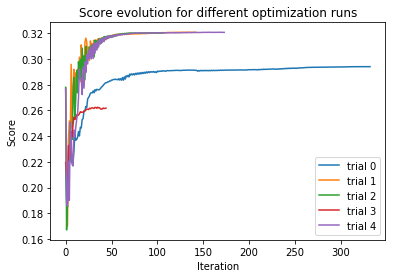

In [18]:
converged_scores = np.array([s[-1] for s in scores_all_trials])
q3 = np.percentile(converged_scores, 75)
q1 = np.percentile(converged_scores, 25)
iqr = q3 - q1
inlier_min = q1 - 1.5 * iqr
inlier_max = q3 + 1.5 * iqr
inliers = np.where((converged_scores > inlier_min) & (converged_scores < inlier_max))[0]
print 'inliers', inliers

plt.figure();
for trial_idx, scores in enumerate(scores_all_trials):
    plt.plot(scores, label='trial ' + str(trial_idx));
plt.xlabel('Iteration');
plt.ylabel('Score');
plt.legend();
plt.title('Score evolution for different optimization runs');

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
T_all_trials = np.array(T_all_trials)
t_std = np.std(pca.fit_transform(T_all_trials[inliers[:,None] ,[3,7,11]])[0])
t_std_um = t_std * XY_PIXEL_DISTANCE_TB
print 'Widest standard deviation of converged translation parameters for different trials: %.2f voxels, %.2f um' % (t_std, t_std_um)

# tx_std = np.std(T_all_trials[inliers, 3])
# ty_std = np.std(T_all_trials[inliers, 7])
# tz_std = np.std(T_all_trials[inliers, 11])
# tx_std_um = tx_std * XY_PIXEL_DISTANCE_TB
# ty_std_um = ty_std * XY_PIXEL_DISTANCE_TB
# tz_std_um = tz_std * XY_PIXEL_DISTANCE_TB
# print 'tx std:', tx_std, 'voxels', tx_std_um, 'um'
# print 'ty std:', ty_std, 'voxels', ty_std_um, 'um'
# print 'tz std:', tz_std, 'voxels', tz_std_um, 'um'

# plt.scatter(np.ones((5,)), np.array(T_all_trials)[:, 3], marker='+');
# plt.scatter(2*np.ones((5,)), np.array(T_all_trials)[:, 7], marker='+');
# plt.scatter(3*np.ones((5,)), np.array(T_all_trials)[:, 11], marker='+');

Best trial: 1
0.320809839293 0.320755775552
[[  9.11047410e-01   1.90605831e-01   9.68623565e-02   8.60834470e+01]
 [ -1.36177954e-01   9.41296564e-01  -2.91388472e-02   5.81403729e+01]
 [ -8.75583231e-02   4.36355566e-02   9.91272515e-01  -6.38990009e+00]]


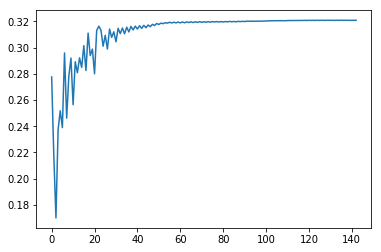

In [25]:
best_trial = np.argsort([np.max(scores) for scores in scores_all_trials])[-1]
T = T_all_trials[best_trial]
scores = scores_all_trials[best_trial]
print 'Best trial:', best_trial
print max(scores), scores[-1]

print T.reshape((3,4))
plt.figure();
plt.plot(scores);
plt.show();

In [22]:
# print T.reshape((3,4))
# plt.plot(scores);
# print max(scores), scores[-1]

# Export parameters and score plots

In [27]:
for trial_idx in range(5):
    
    T = T_all_trials[trial_idx]
    scores = scores_all_trials[trial_idx]
    
    params_fp = \
    DataManager.get_alignment_parameters_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                  classifier_setting_m=classifier_setting,
                                                  classifier_setting_f=classifier_setting,
                                                  warp_setting=warp_setting,
                                                  trial_idx=trial_idx)
    DataManager.save_alignment_parameters(params_fp, T, 
                                          aligner.centroid_m, aligner.centroid_f,
                                          aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
                                          aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)
    upload_from_ec2_to_s3(params_fp)
    
    history_fp = DataManager.get_score_history_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                          classifier_setting_m=classifier_setting,
                                                          classifier_setting_f=classifier_setting,
                                                          warp_setting=warp_setting,
                                                          trial_idx=trial_idx)
    bp.pack_ndarray_file(np.array(scores), history_fp)
    upload_from_ec2_to_s3(history_fp)

    score_plot_fp = \
    DataManager.get_alignment_score_plot_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                         classifier_setting_m=classifier_setting,
                                                         classifier_setting_f=classifier_setting,
                                                         warp_setting=warp_setting,
                                                         trial_idx=trial_idx)
    fig = plt.figure();
    plt.plot(scores);
    plt.savefig(score_plot_fp, bbox_inches='tight')
    plt.close(fig)

    upload_from_ec2_to_s3(score_plot_fp)

aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0_parameters.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0_parameters.txt


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0_scoreHistory.bp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0_scoreHistory.bp


Child returned 0
0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0_scoreEvolution.png s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_0_scoreEvolution.png


Child returned 0
0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1_parameters.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1_parameters.txt


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1_scoreHistory.bp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1_scoreHistory.bp


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1_scoreEvolution.png s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_1_scoreEvolution.png


Child returned 0
0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2_parameters.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2_parameters.txt


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2_scoreHistory.bp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2_scoreHistory.bp


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2_scoreEvolution.png s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_2_scoreEvolution.png


Child returned 0
0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3_parameters.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3_parameters.txt


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3_scoreHistory.bp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3_scoreHistory.bp


Child returned 0
1.00 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3_scoreEvolution.png s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_3_scoreEvolution.png


Child returned 0
0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4_parameters.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4_parameters.txt


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4_scoreHistory.bp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4_scoreHistory.bp


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4_scoreEvolution.png s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4/atlasV3_down32_scoreVolume_clf_30_warp_1_MD657_down32_scoreVolume_clf_30_trial_4_scoreEvolution.png


Child returned 0
0.99 seconds.


# Draw Results

In [34]:
# global_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
# (T, 
#   aligner.centroid_m, aligner.centroid_f,
#   aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
#   aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)

In [36]:
# # Transform moving volume, sided, without surround

# structure = '5N_L'

# vol_m = DataManager.load_volume(stack=stack_moving, structure=structure, downscale=32)

# volume_m_alignedTo_f = \
# transform_volume(vol=vol_m, global_params=global_params, centroid_m=centroid_m, centroid_f=centroid_f,
#                   xdim_f=xdim_f, ydim_f=ydim_f, zdim_f=zdim_f)

In [37]:
# # Set colors for different contour level
# levels = [0.1, 0.25, 0.5, 0.75, .99]
# level_colors = {level: (int(level*255),0,0) for level in levels}

In [42]:
# # Generate overlay visualization

# # For getting correct contour location

# # xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f = \
# # DataManager.load_volume_bbox(stack=stack_fixed, type='score', structure='7N', 
# #                              downscale=32, classifier_setting=classifier_setting)
# # print xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f

# xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f = DataManager.load_cropbox(stack=stack_fixed)[:4]

# # Generate atlas overlay image for every section

# zf, zl = bbox_3d(volume_m_alignedTo_f)[4:]
# sec_first = DataManager.convert_z_to_section(stack=stack_fixed, z=zf, downsample=32)
# sec_last = DataManager.convert_z_to_section(stack=stack_fixed, z=zl, downsample=32)

# for sec in range(sec_first, sec_last+1):
# # for sec in [155]:
    
#     if is_invalid(metadata_cache['sections_to_filenames'][stack_fixed][sec]):
#         continue
    
#     try:
#         img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
#         img = imread(img_fn)
# #         img = imread(DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, 
# #                                                            downscale=32,
# #                                                            structure=convert_to_original_name(structure), 
# #                                                            setting=classifier_setting))
#     except:
#         sys.stderr.write('Error loading scoremap for section %d\n' % sec)
#         continue
    
#     viz = img.copy()
    
#     z1, z2 = DataManager.convert_section_to_z(stack=stack_fixed, sec=sec, downsample=32)
#     z = int(z1)
    
#     # Find moving volume annotation contours
#     c = 0
#     vol = volume_m_alignedTo_f
#     for level in levels:
#         cnts = find_contours(vol[..., z], level=level) # rows, cols
#         c += len(cnts)
#         for cnt in cnts:
#             # r,c to x,y
#             cnt_on_cropped = cnt[:, ::-1] + (xmin_vol_f, ymin_vol_f)
#             cv2.polylines(viz, [cnt_on_cropped.astype(np.int)], True, level_colors[level], 1)
    
#     if c > 0:    
# #         plt.figure(figsize=(20,20));
#         plt.figure();
#         plt.title("sec=%d, z=%d, c=%d" % (sec, z, c));
#         plt.imshow(viz);
#         plt.show();


Error loading scoremap for section 143
Error loading scoremap for section 144
Error loading scoremap for section 145
Error loading scoremap for section 146
Error loading scoremap for section 147
Error loading scoremap for section 148
Error loading scoremap for section 149
Error loading scoremap for section 150
Error loading scoremap for section 151
Error loading scoremap for section 152
Error loading scoremap for section 153
Error loading scoremap for section 154
Error loading scoremap for section 155
Error loading scoremap for section 156
Error loading scoremap for section 157
Error loading scoremap for section 158
Error loading scoremap for section 159
Error loading scoremap for section 160
Error loading scoremap for section 161
Error loading scoremap for section 162
Error loading scoremap for section 163
Error loading scoremap for section 164
Error loading scoremap for section 165
Error loading scoremap for section 166
Error loading scoremap for section 167
Error loading scoremap fo